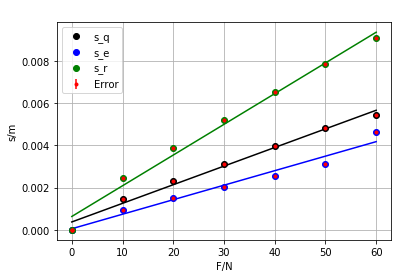

Für E:
 benutzt: 1.: L=0.395 $\pm$ 0.005 m, A=8.821428532826799e-05 $\pm$ 4.444556198594382e-06 s^2/kg, E=134768183288.28888 $\pm$ 19688011802.994045 Pa
          2.: L=0.395 $\pm$ 0.005 m, A=6.87857121048907e-05 $\pm$ 5.777065752779668e-06 s^2/kg, E=99080338331.94931 $\pm$ 14723465525.564655 Pa
 Ergebnis: E = 116924260810.1191 $\pm$ 12292256158.22136 Pa
Für I:
 benutzt: L=0.395 $\pm$ 0.005 m, A=0.0001455000003960107 $\pm$ 7.354507237954172e-06 s^2/kg, E
 Ergebnis: I_r_mess = 1.2075424437648063e-09 $\pm$ 1.2908336437917976e-10 m^4
 benutzt: r=0.00605 $\pm$ 0.0005 m
Ergebnis: I_r_theo = 1.0522316965333259e-09 $\pm$ 3.478451889366367e-10 m^4
(-3, 0.14550000039601071)
(-5, 0.7354507237954171)
-----------
1.728e-09
3.014285008333334e-09
3.5134910317591163e-10


In [18]:
#Braucht man halt, ne?
from scipy import stats
import math
import numpy as np
from matplotlib import pyplot as plt
from lmfit import report_fit
from lmfit.models import LinearModel

#Reg's machen
def fit(x,y,err):
    weights=1/err
    model = LinearModel(independent_vars=['x'])
    result=model.fit(data=y,x=x,weights=weights)
    v=[] #values
    s=[] #stderr
    #0:slope 1
    for name, param in result.params.items():
        v.append(param.value)
        if(param.stderr==None):
            s.append(0)
        else:
            s.append(param.stderr)
    return v,s

def split(value):
    """Gibt die gerundete Mantisse und den Exponenten in der 10er Basis wieder für Postitive werte
    
    Parameter
        value(float)
    Wiedergabe
        exp(int):
    """
    try:
        exp=int(math.log10(value))
        man=value/10**exp
        return exp,man
    except:
        print("Error mit "+str(value))

#zeichnet die gegebenen Messwerte 1-3 inkl reg's, wird gespeichert falls save=True
def zeichnen (x, y1, label1, y2, label2, y3, label3, err, speichername, xlabel, ylabel, titel=" ", save=True):
    #Alles für die 1. Werte
    plt.plot(x, y1, "ok", label=label1)
    plt.errorbar(x, y1, yerr=err, color="r", fmt='.')
    reg1 = fit(x,y1,err)
    plt.plot(x, (reg1[0][0]*x+reg1[0][1]), color="k")
    #...und für die 2.
    plt.plot(x, y2, "ob", label=label2)
    reg2 = fit(x,y2,err)
    plt.plot(x, (reg2[0][0]*x+reg2[0][1]), color="b")
    plt.errorbar(x, y2, yerr=err, color="r", fmt='.')
    #...genau wie für die 3.
    plt.plot(x, y3, "og", label=label3)
    reg3 = fit(x,y3,err)
    plt.plot(x, (reg3[0][0]*x+reg3[0][1]), color="g")
    plt.errorbar(x, y3, yerr=err, color="r", fmt='.',label="Error")
    #Rest des Plots, also z.B. Achsen usw. 
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(titel)
    plt.grid()
    plt.legend()
    if bool(save) == True:
        plt.savefig(speichername)
    plt.show()
    return (reg1, reg2, reg3)

#Für welche F wurde s gemessen?
F = np.array([0,10, 20, 30, 40, 50,60])
#Werte 1. eckiger Stab
L_1 = 0.395
b_1  =0.012
a_1 = 0.012
s_1 = np.array([0,0.00146, 0.00232, 0.00312, 0.00397, 0.00481,0.00545])
#Werte 2. eckiger Stab
L_2 = 0.395
b_2  =0.0061
a_2 = 0.0181
s_2 = np.array([0,0.00095, 0.00151, 0.00204, 0.00256, 0.00311,0.00463])
#Werte runder Stab
r = 0.0121/2
L_r = 0.395
s_r = np.array([0,0.00244, 0.00388, 0.00520, 0.00652, 0.00784,0.00910])
#Fehler der Messgrößen
dL = 0.005
dabr = 0.0005
ds = 0.000005
err_s = np.full(len(F), ds)

#Erstellen des Plots und Rückgabe der reg's
(reg_1, reg_2, reg_r)=zeichnen(x=F, y1=s_1, label1="s_q", y2=s_2, label2="s_e", y3=s_r, label3="s_r", err=err_s, speichername="s(F).png", xlabel="F/N", ylabel="s/m")

#Berechnung von I für die eckigen Stäbe
def I_ef (a, b):
    I_e = 1/12*a**3*b
    return I_e
I_e1 = I_ef(a_1, b_1)
I_e2 = I_ef(a_2, b_2)
#E aus den eckigen Stäben, dann Mittelwert
E_1 = L_1**3/(3*I_e1*reg_1[0][0])
E_2 = L_2**3/(3*I_e2*reg_2[0][0])
E = (E_1+E_2)/2
#I runder Stab
I_r_mess = L_r**3/(3*E*reg_r[0][0])
I_r_theo = math.pi/4*r**4

#Steigungen der reg's inkl Fehler
A_1 = reg_1[0][0]
dA_1 = reg_1[1][0]
A_2 = reg_2[0][0]
dA_2 = reg_2[1][0]
A_r = reg_r[0][0]
dA_r = reg_r[1][0]
#Fehler für die versch. E's
def fdE (L, dL, a, b, dabr, A, dA, E):
    return (math.sqrt((3*dL/L)**2+(-3*dabr/a)**2+(-dabr/b)**2+(-dA/A)**2)*E)
dE_1 = fdE(L_1, dL, a_1, b_1, dabr, A_1, dA_1, E_1)
dE_2 = fdE(L_2, dL, a_2, b_2, dabr, A_2, dA_2, E_2)
dE = 1/2*math.sqrt((dE_1)**2+(dE_2)**2)
#Fehler I_r
dI_r_mess = I_r_theo*math.sqrt((3*dL/L_r)**2+(-dE/E)**2+(-dA_r/A_r)**2)
dI_r_theo = math.pi*r**3*dabr

#Und die Ergebnisse die wir haben wollen :D (Ich weiß, das geht bestimmt schöner, Alex)
print("Für E:")
print(f" benutzt: 1.: L={L_1} $\pm$ {dL} m, A={A_1} $\pm$ {dA_1} s^2/kg, E={E_1} $\pm$ {dE_1} Pa")
print(f"          2.: L={L_2} $\pm$ {dL} m, A={A_2} $\pm$ {dA_2} s^2/kg, E={E_2} $\pm$ {dE_2} Pa")
print(f" Ergebnis: E = {E} $\pm$ {dE} Pa")
print("Für I:")
print(f" benutzt: L={L_r} $\pm$ {dL} m, A={A_r} $\pm$ {dA_r} s^2/kg, E")
print(f" Ergebnis: I_r_mess = {I_r_mess} $\pm$ {dI_r_mess} m^4")
print(f" benutzt: r={r} $\pm$ {dabr} m")
print(f"Ergebnis: I_r_theo = {I_r_theo} $\pm$ {dI_r_theo} m^4")




print(split(A_r))
print(split(dA_r))


print("-----------")
print(I_e1)
print(I_e2)

def fdI_e (a, dab, b):

    return math.sqrt((3*dabr/a)**2+(dab/b)**2)

dI_e1 = fdI_e(a_1, dabr, b_1)*I_e1

dI_e2 = fdI_e(a_2, dabr, b_2)*I_e2
print(dI_e2)

[1.6000000000013088, 1.0000000000021811]
[0.41633319850481326, 0.6904105007023872]
([0.0019999999999996917, 5.653101255206864e-16], [0, 0])
